In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
#가중치 시각화
model = keras.models.load_model('cnn_model.keras')

In [3]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [7]:
conv=model.layers[0]

In [9]:
#필터(3,3,32),가중치 32,
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [10]:
#numpy타입으로 변경
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.022825276 0.26947543


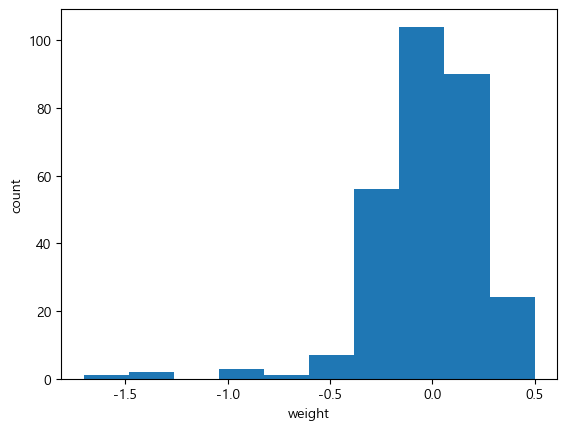

In [12]:
#1차원 행렬로 변경
#각각의 값을 히스토그램에 출력
#0에 근접할수록 의미가 없고, 다른 값들은 의미가 존재
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

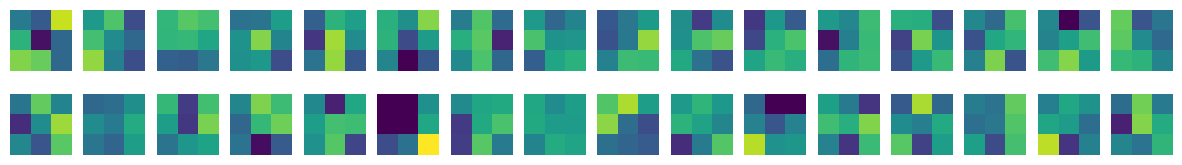

In [13]:
#3x3x1 사이즈 32개 이미지 출력
#이미지 출력 2행 16열 형태로 32개 그래프 출력
#vmin = -0.5, vmax=0.5 이미지마다 밝기가 다르기에, 이것을 기준점으로 통일
fig,axs=plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [22]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=(3),activation='relu',padding='same',input_shape=(28,28,1)))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [24]:
no_training_weights = no_training_conv.weights[0].numpy()

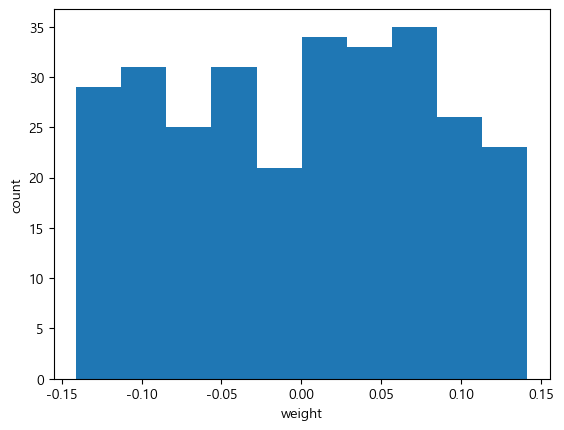

In [25]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
#3x3x1 사이즈 32개 이미지 출력
#이미지 출력 2행 16열 형태로 32개 그래프 출력
#vmin = -0.5, vmax=0.5 이미지마다 밝기가 다르기에, 이것을 기준점으로 통일
fig,axs=plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()